<a href="https://colab.research.google.com/github/Mirucla/Applied-Data-Management/blob/main/In_class10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

#0.) Import and Clean Data

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df=pd.read_csv("/content/gdrive/MyDrive/Country-data.csv")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<ipython-input-7-bbb97e436835>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


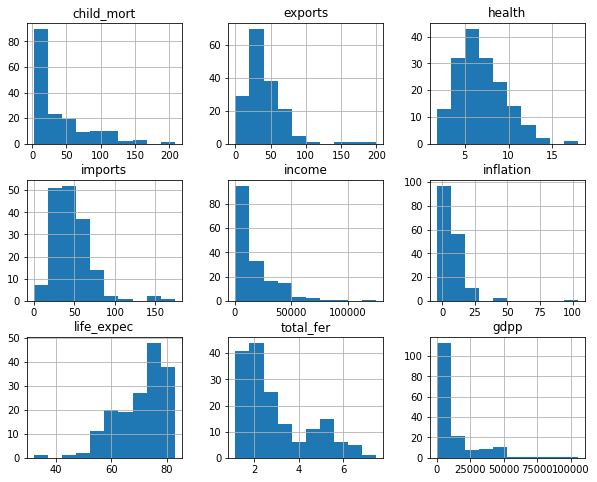

In [7]:
fig, ax = plt.subplots()
df.hist(ax=ax)
fig.set_size_inches(10, 8)

From the histogram plot, we can see that some features have a roughly normal distribution, such as 'inflation' and 'Total_fer', while other features have a more skewed distribution, such as 'life_expec' and 'gdpp'. So, we need some transformation before using it for the PCA analysis.

<Axes: >

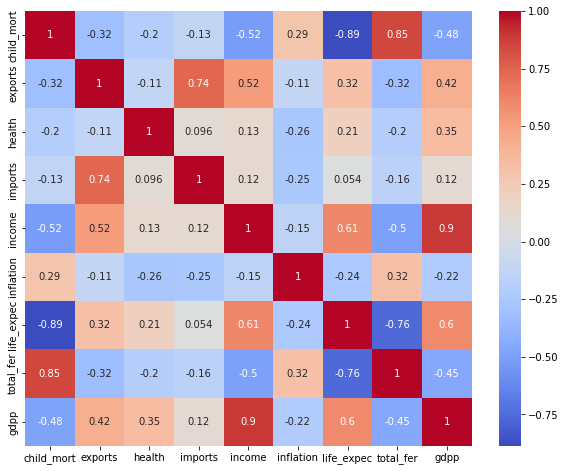

In [8]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the heatmap plot, we can observate that some features are strongly positively correlated with each other, such as "income and Gdpp', while other features are strongly negatively correlated with each other, such as 'child_mort' and 'life_expec'. This may raise multicollinearity issues in the data as this will provide redundant or overlapping information in a model.

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_cols]
z_scores = stats.zscore(df_numeric)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_filtered = df[filtered_entries]

In [13]:
df_filtered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [38]:
df_filtered.shape

(153, 10)

In [39]:
df.shape

(167, 10)

As can be observed from the data shape, there are 14 outliers that have been removed by the outlier detection through Z score filtering. This will hopefully make the dataset fit for the PCA Analysis. 

In [19]:
cols_to_scale = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
                 'life_expec', 'total_fer', 'gdpp']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered[cols_to_scale])
df_scaled

array([[ 1.46183636, -1.41330427,  0.31809414, ..., -1.73823548,
         1.94438462, -0.72205486],
       [-0.56911214, -0.52600184, -0.08875965, ...,  0.71229884,
        -0.88698624, -0.46758977],
       [-0.27385196, -0.01333821, -1.02886841, ...,  0.73668227,
        -0.04504383, -0.44097058],
       ...,
       [-0.3842296 ,  1.64295967,  0.02579142, ...,  0.32216403,
        -0.6832905 , -0.66759343],
       [ 0.5263859 , -0.42741268, -0.62991469, ..., -0.36057191,
         1.16355093, -0.66759343],
       [ 1.26591606, -0.08235062, -0.34946208, ..., -2.25028743,
         1.65921057, -0.65680187]])

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

In [22]:
print(pca.explained_variance_ratio_)

[0.47638387 0.16902847]


In [27]:

df_S= pd.DataFrame(df_scaled, columns=cols_to_scale)
df_S['country'] = df['country']
df_S.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055,Afghanistan
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590,Albania
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971,Algeria
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878,Angola
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874,Antigua and Barbuda


# 2.) Plot a Score Plot

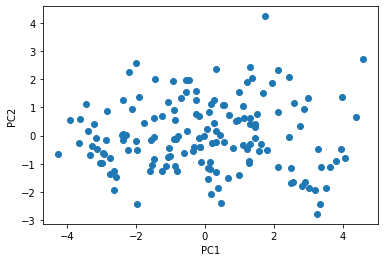

In [23]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


From the scatter plot, we can see that the data are clustered around both PCA 1 and 2 almost equally. 

# 3.) Rank the features in order of importance according to PCA

In [24]:
pca = PCA(n_components=9)
pca.fit(df_scaled)

loading_scores = pca.components_.T * np.sqrt(pca.explained_variance_)

abs_loading_scores = np.abs(loading_scores)
avg_loading_scores = np.mean(abs_loading_scores, axis=1)
feature_ranks = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': avg_loading_scores})
feature_ranks.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_ranks)


      Feature  Importance
1  child_mort    0.243093
2     exports    0.241783
5      income    0.236094
6   inflation    0.227577
7  life_expec    0.226163
8   total_fer    0.226051
3      health    0.218947
4     imports    0.214938
0     country    0.211149


# 4.) Plot a heat map of the feature importance

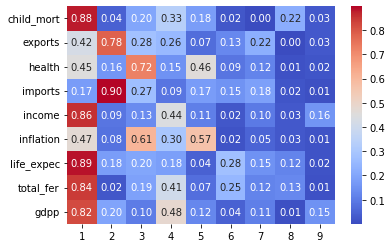

<Figure size 2880x1728 with 0 Axes>

In [34]:
feature_names = list(df_S.columns[:-1])
sns.heatmap(abs_loading_scores, cmap='coolwarm', annot=True, xticklabels=range(1,10), yticklabels=feature_names, fmt='.2f')
plt.figure(figsize=(40,24))
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between graphs of 4 & 5

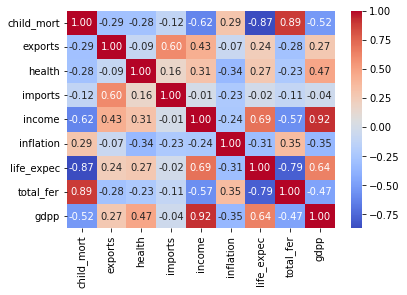

In [36]:
sns.heatmap(df_S.corr(), cmap='coolwarm', annot=True, fmt='.2f')

plt.show()

The first plot is a heatmap of the feature importance, which shows how much each original feature contributes to each principal component in the PCA analysis. 

The second plot is a correlation plot of the original features, which shows the pairwise correlations between all original features in the dataset. 

Comparing the two plots, we can see that there is significant impact on first component by various factors. Whereas exports and imports impact PCA 2, health and inflation impact PCA 5 and income, total_fer and gdpp have an impact on PCA 4. This is also evidenced by correlation plot. 

6.) Run a PCA with 9 PCs. Plot the Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

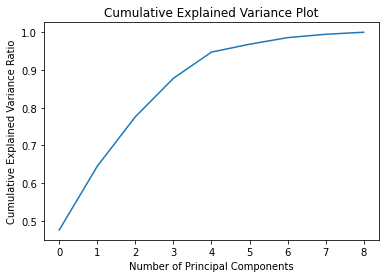

In [37]:

pca = PCA(n_components=9)
pca.fit(df_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.show()

The plot shows the percentage of variance explained by each principal component as well as the cumulative percentage of variance explained. The x-axis shows the number of principal components and the y-axis shows the cumulative explained variance ratio.

From the plot, we can see that the first few principal components explain the majority of the variance in the data, with each subsequent component explaining progressively less variance. In this case, 4 components almost explain almost 90% of the variation. 